In [2]:
from pydtmc import *
import numpy as np
import scipy.linalg as sp
import matplotlib.pyplot as plt

Para simular la caminata aleatoria, consideraremos una cadena de Markov cuya matriz de transición se basa en el grafo. Como la probabilidad de pasar de una página a otra que tenga un enlace a ella es igual para todos los enlaces de la primer página, las entradas de una determinada fila $i$ serán 0 o $\frac{1}{e_i}$, donde $e_i$ es la cantidad de enlaces salientes desde el $i$-ésimo estado.

El último estado en particular es problemático, ya que no tiene enlaces saliendo de él. Por esta razón nuestra matriz no describe una cadena de Markov. Para solucionar esto consideraremos que hay una probabilidad igual de ir desde esta página hacia cualquier otra.

Entonces, para la red de la Figura 1, la matriz de transición será (si ordenamos los estados alfabéticamente)

$$P = \begin{pmatrix}
0 & 0 & 0 & 0 & \frac{1}{2} & \frac{1}{2} & 0 \\
\frac{1}{3} & 0 & \frac{1}{3} & 0 & 0 & \frac{1}{3} & 0 \\
0 & 0 & 0 & \frac{1}{2} & 0 & \frac{1}{2} & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 \\
\frac{1}{4} & 0 & 0 & \frac{1}{4} & 0 & \frac{1}{4} & \frac{1}{4} \\
\frac{1}{2} & \frac{1}{2} & 0 & 0 & 0 & 0 & 0 \\
\frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & 0\\
\end{pmatrix}$$

[23, 14, 9, 7, 14, 29, 5]

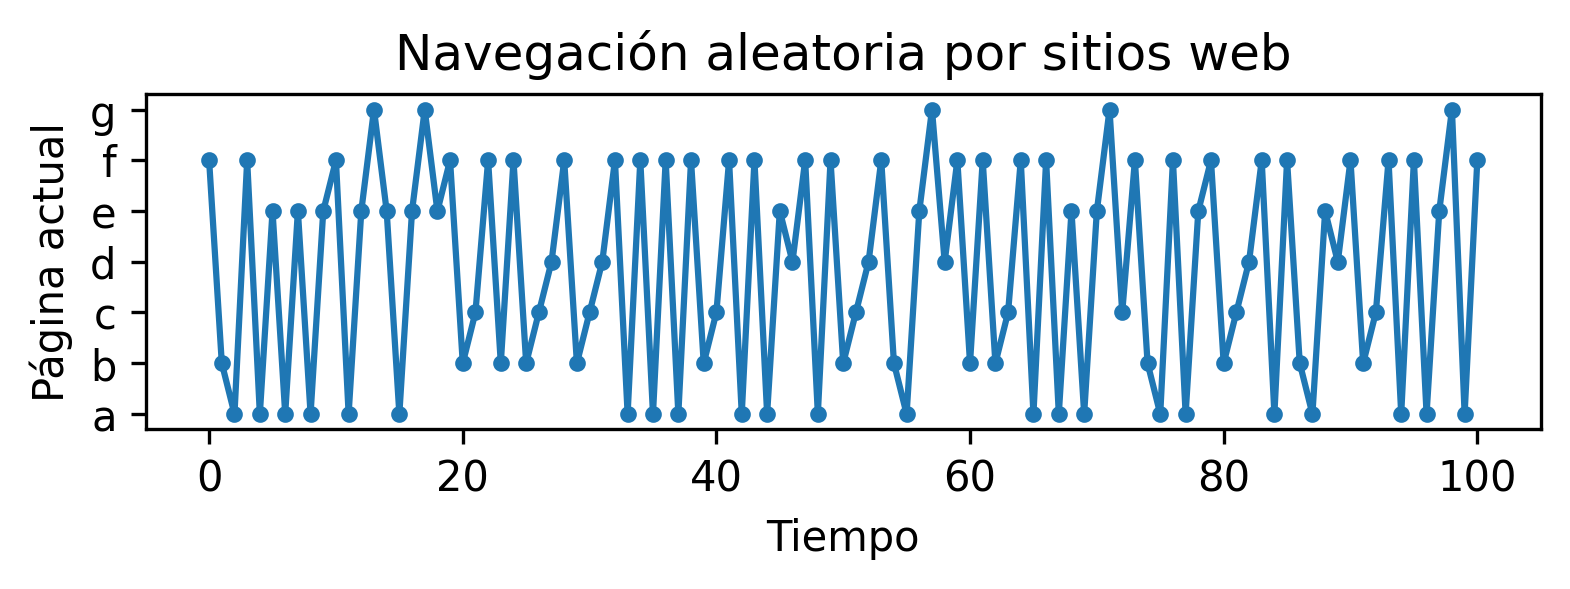

In [61]:
p = [
  [0,0,0,0,1/2,1/2,0],
  [1/3,0,1/3,0,0,1/3,0],
  [0,0,0,1/2,0,1/2,0],
  [0,0,0,0,0,1,0],
  [1/4,0,0,1/4,0,1/4,1/4],
  [1/2,1/2,0,0,0,0,0],
  [1/6,1/6,1/6,1/6,1/6,1/6,0],
 ]
estados = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
mc = MarkovChain(p, estados)
f = plt.figure(dpi=300)
ax = f.add_subplot(111)
ax.set_aspect(4)
w = mc.walk(100)
plt.yticks(range(len(estados)), estados)
xd = estados
xdd = { xd[i]:i for i in range(len(xd))}
plt.plot([xdd[i] for i in w], ".-")
plt.title("Navegación aleatoria por sitios web")
plt.xlabel("Tiempo")
plt.ylabel("Página actual")
[sum([1 for y in w if y == x]) for x in estados]

Para calcular el rango de cada página, debemos encontrar la distribución límite. Para esto, debemos buscar el vector $\pi$ que cumpla

$$ \pi P = \pi $$
$$ \sum_{i=1}^7 \pi_i = 1

Transponiendo ambos lados de la primer ecuación, tenemos

$$ P^T \pi^T = \pi^T $$

Luego, debemos encontrar el autovector asociado a $\lambda=1$ de $P^T$. Para esto, planteamos

$$(P^T - I)\pi = 0$$

Resolviendo este sistema llegamos a

$$ \pi \simeq \begin{pmatrix} 0.25 & 0.16 & 0.06 & 0.07 & 0.13 & 0.31 & 0.03 \end{pmatrix}$$

In [4]:
v = np.transpose(sp.null_space(np.transpose(p) - np.eye(7)))[0]
v / sum(v)

array([0.24533333, 0.16      , 0.05866667, 0.06666667, 0.128     ,
       0.30933333, 0.032     ])